# **Enhancing Object Detection in YOLOS-Small through Advanced LoRA Methods**


# NOTE: This file is intended for DISPLAY PURPOSES ONLY and will NOT run independently.  
For full execution, please refer to the complete script:  


```
Enhancing_YOLOS_S_through_Advanced_LoRA_Methods.py
```


This file contains extracted sections to showcase outputs in GitHub.


## **6. Implementing LoRA Variants**


### **(b) AdaLoRA- Adaptive LoRA**

#### **AdaLoraConfig**

In [ ]:
# Define model for AdaLoRA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_for_AdaLoRA = YolosForObjectDetection.from_pretrained(model_name).to(device)

# Configure AdaLoRA
adalora_config = AdaLoraConfig(
    target_r=16,
    init_r=24,
    tinit=20,
    tfinal=40,
    total_step=100,
    deltaT=8,
    beta1=0.9,
    beta2=0.88,
    orth_reg_weight=0.01,
    target_modules=target_modules
)

# Apply AdaLoRA to the model
model_with_AdaLoRA = get_peft_model(model_for_AdaLoRA, adalora_config)
model_with_AdaLoRA.print_trainable_parameters()

trainable params: 442,944 || all params: 31,127,736 || trainable%: 1.4230


In [ ]:
# Inspect AdaLoRA Layers
for name, param in model_with_AdaLoRA.named_parameters():
    print(f"{name} - requires_grad: {param.requires_grad}")

for name, param in model_with_AdaLoRA.named_parameters():
    if "lora" in name:
        print(name, param.shape)


base_model.model.vit.embeddings.cls_token - requires_grad: False
base_model.model.vit.embeddings.detection_tokens - requires_grad: False
base_model.model.vit.embeddings.position_embeddings - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.weight - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.bias - requires_grad: False
base_model.model.vit.encoder.mid_position_embeddings - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.weight - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.bias - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_E.default - requires_grad: True
base_model.model.vit.encoder

In [ ]:
# Mean value of AdaLoRA layers before training
for name, param in model_with_AdaLoRA.named_parameters():
    if "lora" in name:
        print(f"{name} mean before training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default mean before training: 0.000040
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default mean before training: 0.000413
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_E.default mean before training: 0.000000
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_A.default mean before training: 0.000106
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_B.default mean before training: 0.000041
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_E.default mean before training: 0.000000
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_A.default mean before training: 0.000299
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_B.default mean before training: 0.000265
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_E.default mean before training: 0.000000
base_model.model.vi

In [ ]:
adalora_total_parameters = [p for p in model_with_AdaLoRA.parameters()]
print(f"Number of AdaLoRA parameter tensors: {len(adalora_total_parameters)}")

adalora_parameters = [p for p in model_with_AdaLoRA.parameters() if p.requires_grad]
print(f"Number of AdaLoRA trainable parameter tensors (requires_grad=True): {len(adalora_parameters)}")


Number of AdaLoRA parameter tensors: 308
Number of AdaLoRA trainable parameter tensors (requires_grad=True): 72


#### **Train Model with AdaLoRA**

  0%|          | 1/368 [00:04<26:35,  4.35s/it]

Epoch 1, Batch 0: Loss = 1.1051


  3%|▎         | 11/368 [00:51<21:15,  3.57s/it]

Epoch 1, Batch 10: Loss = 0.9333


  6%|▌         | 21/368 [01:36<24:28,  4.23s/it]

Epoch 1, Batch 20: Loss = 1.1211


  8%|▊         | 31/368 [02:18<23:45,  4.23s/it]

Epoch 1, Batch 30: Loss = 0.7977


 11%|█         | 41/368 [02:58<20:15,  3.72s/it]

Epoch 1, Batch 40: Loss = 1.0563


 14%|█▍        | 51/368 [03:46<26:09,  4.95s/it]

Epoch 1, Batch 50: Loss = 1.2459


 17%|█▋        | 61/368 [04:23<19:57,  3.90s/it]

Epoch 1, Batch 60: Loss = 1.1973


 19%|█▉        | 71/368 [04:57<14:57,  3.02s/it]

Epoch 1, Batch 70: Loss = 0.8527


 22%|██▏       | 81/368 [05:41<20:18,  4.25s/it]

Epoch 1, Batch 80: Loss = 0.9604


 25%|██▍       | 91/368 [06:22<18:29,  4.01s/it]

Epoch 1, Batch 90: Loss = 1.1436


 27%|██▋       | 101/368 [07:02<15:49,  3.56s/it]

Epoch 1, Batch 100: Loss = 0.9613


 30%|███       | 111/368 [07:33<12:53,  3.01s/it]

Epoch 1, Batch 110: Loss = 1.0824


 33%|███▎      | 121/368 [08:13<14:48,  3.60s/it]

Epoch 1, Batch 120: Loss = 1.0394


 36%|███▌      | 131/368 [08:50<13:46,  3.49s/it]

Epoch 1, Batch 130: Loss = 0.9621


 38%|███▊      | 141/368 [09:31<13:08,  3.47s/it]

Epoch 1, Batch 140: Loss = 1.1028


 41%|████      | 151/368 [10:12<17:14,  4.77s/it]

Epoch 1, Batch 150: Loss = 1.1063


 44%|████▍     | 161/368 [10:52<14:37,  4.24s/it]

Epoch 1, Batch 160: Loss = 1.0543


 46%|████▋     | 171/368 [11:33<14:31,  4.42s/it]

Epoch 1, Batch 170: Loss = 1.2512


 49%|████▉     | 181/368 [12:16<15:27,  4.96s/it]

Epoch 1, Batch 180: Loss = 1.1451


 52%|█████▏    | 191/368 [12:57<11:58,  4.06s/it]

Epoch 1, Batch 190: Loss = 0.9523


 55%|█████▍    | 201/368 [13:37<12:02,  4.33s/it]

Epoch 1, Batch 200: Loss = 1.0353


 57%|█████▋    | 211/368 [14:15<11:13,  4.29s/it]

Epoch 1, Batch 210: Loss = 1.2636


 60%|██████    | 221/368 [14:50<09:05,  3.71s/it]

Epoch 1, Batch 220: Loss = 1.1208


 63%|██████▎   | 231/368 [15:24<06:53,  3.02s/it]

Epoch 1, Batch 230: Loss = 0.7972


 65%|██████▌   | 241/368 [16:05<08:52,  4.19s/it]

Epoch 1, Batch 240: Loss = 1.0415


 68%|██████▊   | 251/368 [16:36<06:41,  3.43s/it]

Epoch 1, Batch 250: Loss = 1.4278


 71%|███████   | 261/368 [17:15<05:40,  3.18s/it]

Epoch 1, Batch 260: Loss = 1.2548


 74%|███████▎  | 271/368 [17:55<06:53,  4.26s/it]

Epoch 1, Batch 270: Loss = 0.9802


 76%|███████▋  | 281/368 [18:34<05:34,  3.85s/it]

Epoch 1, Batch 280: Loss = 1.1039


 79%|███████▉  | 291/368 [19:15<04:47,  3.73s/it]

Epoch 1, Batch 290: Loss = 1.0527


 82%|████████▏ | 301/368 [19:49<03:24,  3.06s/it]

Epoch 1, Batch 300: Loss = 1.1613


 85%|████████▍ | 311/368 [20:26<03:02,  3.20s/it]

Epoch 1, Batch 310: Loss = 1.0076


 87%|████████▋ | 321/368 [21:07<02:39,  3.40s/it]

Epoch 1, Batch 320: Loss = 1.0989


 90%|████████▉ | 331/368 [21:53<02:49,  4.58s/it]

Epoch 1, Batch 330: Loss = 1.0193


 93%|█████████▎| 341/368 [22:37<02:16,  5.06s/it]

Epoch 1, Batch 340: Loss = 1.0273


 95%|█████████▌| 351/368 [23:23<01:28,  5.21s/it]

Epoch 1, Batch 350: Loss = 0.9564


 98%|█████████▊| 361/368 [24:17<00:37,  5.37s/it]

Epoch 1, Batch 360: Loss = 1.1125


100%|██████████| 368/368 [24:44<00:00,  4.04s/it]


Epoch 1 Complete. Average train Loss: 4.2885, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:57<00:00,  1.12s/it]


Epoch 1 - Validation Loss: 4.2822


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.937 at location [0.99, 266.95, 323.42, 634.96]
Detected teddy bear with confidence 0.855 at location [197.56, 220.45, 353.2, 530.64]
Detected teddy bear with confidence 0.616 at location [297.8, 66.58, 427.94, 536.47]
Detected teddy bear with confidence 0.967 at location [108.95, 1.44, 427.56, 533.97]
Detected teddy bear with confidence 0.984 at location [0.11, 54.64, 197.81, 285.66]
Detected teddy bear with confidence 0.519 at location [102.89, 417.84, 321.23, 638.76]


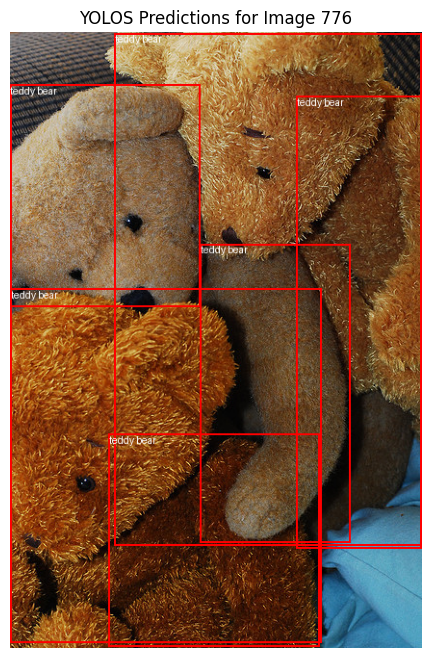

100%|██████████| 630/630 [02:27<00:00,  4.28it/s]


mAP@[0.5:0.95]: tensor(0.3830)
Detailed mAP results: {'map': tensor(0.3830), 'map_50': tensor(0.5580), 'map_75': tensor(0.4093), 'map_small': tensor(0.1198), 'map_medium': tensor(0.3409), 'map_large': tensor(0.5479), 'mar_1': tensor(0.3156), 'mar_10': tensor(0.4539), 'mar_100': tensor(0.4648), 'mar_small': tensor(0.1611), 'mar_medium': tensor(0.4263), 'mar_large': tensor(0.6236), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 1 - Validation mAP Score: 0.3830


map   map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.383014  0.55796  0.409292   0.119819    0.340873   0.547895  0.315577   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.453865  0.464784    0.16106     0.42633   0.623616           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3830 at epoch 1


  0%|          | 1/368 [00:04<27:28,  4.49s/it]

Epoch 2, Batch 0: Loss = 1.0414


  3%|▎         | 11/368 [00:45<25:21,  4.26s/it]

Epoch 2, Batch 10: Loss = 0.7933


  6%|▌         | 21/368 [01:29<26:40,  4.61s/it]

Epoch 2, Batch 20: Loss = 1.0699


  8%|▊         | 31/368 [02:09<20:41,  3.68s/it]

Epoch 2, Batch 30: Loss = 1.0001


 11%|█         | 41/368 [02:51<26:02,  4.78s/it]

Epoch 2, Batch 40: Loss = 0.9508


 14%|█▍        | 51/368 [03:34<22:59,  4.35s/it]

Epoch 2, Batch 50: Loss = 1.0143


 17%|█▋        | 61/368 [04:14<18:59,  3.71s/it]

Epoch 2, Batch 60: Loss = 0.9782


 19%|█▉        | 71/368 [05:02<22:27,  4.54s/it]

Epoch 2, Batch 70: Loss = 1.0547


 22%|██▏       | 81/368 [05:41<18:22,  3.84s/it]

Epoch 2, Batch 80: Loss = 1.2429


 25%|██▍       | 91/368 [06:25<19:28,  4.22s/it]

Epoch 2, Batch 90: Loss = 1.0662


 27%|██▋       | 101/368 [07:04<16:49,  3.78s/it]

Epoch 2, Batch 100: Loss = 1.0678


 30%|███       | 111/368 [07:41<16:12,  3.78s/it]

Epoch 2, Batch 110: Loss = 1.3777


 33%|███▎      | 121/368 [08:17<14:06,  3.43s/it]

Epoch 2, Batch 120: Loss = 0.9422


 36%|███▌      | 131/368 [08:57<17:26,  4.41s/it]

Epoch 2, Batch 130: Loss = 0.7668


 38%|███▊      | 141/368 [09:40<16:16,  4.30s/it]

Epoch 2, Batch 140: Loss = 1.1154


 41%|████      | 151/368 [10:24<14:12,  3.93s/it]

Epoch 2, Batch 150: Loss = 1.0780


 44%|████▍     | 161/368 [11:07<14:42,  4.26s/it]

Epoch 2, Batch 160: Loss = 0.9543


 46%|████▋     | 171/368 [11:51<13:27,  4.10s/it]

Epoch 2, Batch 170: Loss = 1.2978


 49%|████▉     | 181/368 [12:25<10:50,  3.48s/it]

Epoch 2, Batch 180: Loss = 1.2779


 52%|█████▏    | 191/368 [13:03<10:27,  3.55s/it]

Epoch 2, Batch 190: Loss = 1.3945


 55%|█████▍    | 201/368 [13:45<10:57,  3.94s/it]

Epoch 2, Batch 200: Loss = 1.0558


 57%|█████▋    | 211/368 [14:24<11:35,  4.43s/it]

Epoch 2, Batch 210: Loss = 1.2313


 60%|██████    | 221/368 [15:05<10:26,  4.26s/it]

Epoch 2, Batch 220: Loss = 1.3258


 63%|██████▎   | 231/368 [15:39<08:21,  3.66s/it]

Epoch 2, Batch 230: Loss = 1.1217


 65%|██████▌   | 241/368 [16:20<07:53,  3.73s/it]

Epoch 2, Batch 240: Loss = 0.9965


 68%|██████▊   | 251/368 [17:02<08:48,  4.52s/it]

Epoch 2, Batch 250: Loss = 1.0260


 71%|███████   | 261/368 [17:41<06:33,  3.68s/it]

Epoch 2, Batch 260: Loss = 1.3764


 74%|███████▎  | 271/368 [18:19<05:26,  3.37s/it]

Epoch 2, Batch 270: Loss = 1.1334


 76%|███████▋  | 281/368 [19:05<06:18,  4.35s/it]

Epoch 2, Batch 280: Loss = 1.0737


 79%|███████▉  | 291/368 [19:42<04:16,  3.33s/it]

Epoch 2, Batch 290: Loss = 1.1803


 82%|████████▏ | 301/368 [20:25<05:16,  4.73s/it]

Epoch 2, Batch 300: Loss = 1.0637


 85%|████████▍ | 311/368 [20:58<03:37,  3.81s/it]

Epoch 2, Batch 310: Loss = 0.8918


 87%|████████▋ | 321/368 [21:41<03:30,  4.48s/it]

Epoch 2, Batch 320: Loss = 1.3186


 90%|████████▉ | 331/368 [22:14<01:53,  3.07s/it]

Epoch 2, Batch 330: Loss = 1.0247


 93%|█████████▎| 341/368 [22:55<01:57,  4.37s/it]

Epoch 2, Batch 340: Loss = 1.1579


 95%|█████████▌| 351/368 [23:40<01:22,  4.86s/it]

Epoch 2, Batch 350: Loss = 1.2330


 98%|█████████▊| 361/368 [24:17<00:22,  3.25s/it]

Epoch 2, Batch 360: Loss = 1.4797


100%|██████████| 368/368 [24:44<00:00,  4.03s/it]


Epoch 2 Complete. Average train Loss: 4.3183, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:58<00:00,  1.13s/it]


Epoch 2 - Validation Loss: 4.2783


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.937 at location [0.99, 266.94, 323.42, 634.96]
Detected teddy bear with confidence 0.856 at location [197.57, 220.45, 353.2, 530.64]
Detected teddy bear with confidence 0.617 at location [297.8, 66.59, 427.94, 536.48]
Detected teddy bear with confidence 0.967 at location [108.95, 1.44, 427.56, 533.97]
Detected teddy bear with confidence 0.984 at location [0.11, 54.65, 197.81, 285.67]
Detected teddy bear with confidence 0.521 at location [102.89, 417.83, 321.24, 638.76]


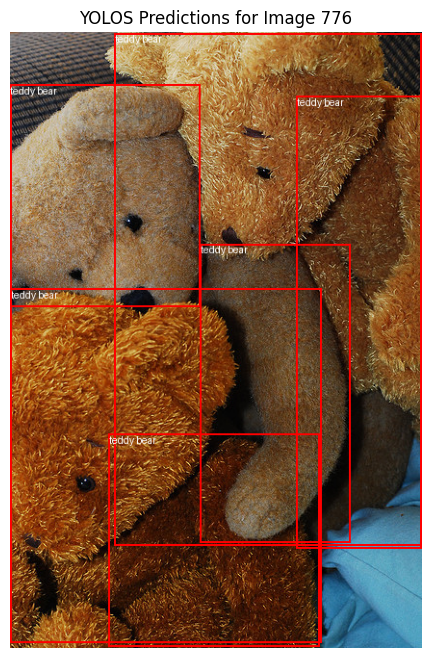

100%|██████████| 630/630 [02:27<00:00,  4.28it/s]


mAP@[0.5:0.95]: tensor(0.3832)
Detailed mAP results: {'map': tensor(0.3832), 'map_50': tensor(0.5583), 'map_75': tensor(0.4094), 'map_small': tensor(0.1199), 'map_medium': tensor(0.3412), 'map_large': tensor(0.5479), 'mar_1': tensor(0.3156), 'mar_10': tensor(0.4542), 'mar_100': tensor(0.4650), 'mar_small': tensor(0.1612), 'mar_medium': tensor(0.4273), 'mar_large': tensor(0.6236), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 2 - Validation mAP Score: 0.3832


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.383181  0.558277  0.409402   0.119878    0.341191    0.54792  0.315569   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.454166  0.465006   0.161155    0.427349   0.623618           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3832 at epoch 2


  0%|          | 1/368 [00:05<32:30,  5.32s/it]

Epoch 3, Batch 0: Loss = 0.9825


  3%|▎         | 11/368 [00:51<27:34,  4.63s/it]

Epoch 3, Batch 10: Loss = 1.2436


  6%|▌         | 21/368 [01:34<23:29,  4.06s/it]

Epoch 3, Batch 20: Loss = 1.0859


  8%|▊         | 31/368 [02:19<26:25,  4.70s/it]

Epoch 3, Batch 30: Loss = 0.9769


 11%|█         | 41/368 [02:59<21:53,  4.02s/it]

Epoch 3, Batch 40: Loss = 1.0301


 14%|█▍        | 51/368 [03:40<24:25,  4.62s/it]

Epoch 3, Batch 50: Loss = 1.2932


 17%|█▋        | 61/368 [04:18<19:23,  3.79s/it]

Epoch 3, Batch 60: Loss = 1.0411


 19%|█▉        | 71/368 [05:02<22:28,  4.54s/it]

Epoch 3, Batch 70: Loss = 1.1851


 22%|██▏       | 81/368 [05:47<20:03,  4.19s/it]

Epoch 3, Batch 80: Loss = 0.9538


 25%|██▍       | 91/368 [06:22<17:50,  3.86s/it]

Epoch 3, Batch 90: Loss = 1.2008


 27%|██▋       | 101/368 [07:01<17:55,  4.03s/it]

Epoch 3, Batch 100: Loss = 1.0946


 30%|███       | 111/368 [07:36<14:13,  3.32s/it]

Epoch 3, Batch 110: Loss = 0.9133


 33%|███▎      | 121/368 [08:12<16:36,  4.03s/it]

Epoch 3, Batch 120: Loss = 1.2722


 36%|███▌      | 131/368 [08:48<14:00,  3.55s/it]

Epoch 3, Batch 130: Loss = 1.0794


 38%|███▊      | 141/368 [09:36<16:08,  4.27s/it]

Epoch 3, Batch 140: Loss = 1.0575


 41%|████      | 151/368 [10:17<14:42,  4.07s/it]

Epoch 3, Batch 150: Loss = 0.8325


 44%|████▍     | 161/368 [10:54<12:58,  3.76s/it]

Epoch 3, Batch 160: Loss = 0.9416


 46%|████▋     | 171/368 [11:30<13:16,  4.05s/it]

Epoch 3, Batch 170: Loss = 0.9415


 49%|████▉     | 181/368 [12:05<08:49,  2.83s/it]

Epoch 3, Batch 180: Loss = 1.1910


 52%|█████▏    | 191/368 [12:53<13:57,  4.73s/it]

Epoch 3, Batch 190: Loss = 1.2354


 55%|█████▍    | 201/368 [13:33<11:51,  4.26s/it]

Epoch 3, Batch 200: Loss = 1.1118


 57%|█████▋    | 211/368 [14:09<10:22,  3.97s/it]

Epoch 3, Batch 210: Loss = 1.1379


 60%|██████    | 221/368 [14:47<08:45,  3.57s/it]

Epoch 3, Batch 220: Loss = 1.2037


 63%|██████▎   | 231/368 [15:27<09:01,  3.95s/it]

Epoch 3, Batch 230: Loss = 1.0307


 65%|██████▌   | 241/368 [16:08<07:59,  3.78s/it]

Epoch 3, Batch 240: Loss = 1.1189


 68%|██████▊   | 251/368 [16:48<07:57,  4.08s/it]

Epoch 3, Batch 250: Loss = 1.2014


 71%|███████   | 261/368 [17:27<06:38,  3.73s/it]

Epoch 3, Batch 260: Loss = 1.1105


 74%|███████▎  | 271/368 [18:09<05:57,  3.69s/it]

Epoch 3, Batch 270: Loss = 1.0969


 76%|███████▋  | 281/368 [18:51<05:10,  3.57s/it]

Epoch 3, Batch 280: Loss = 1.0042


 79%|███████▉  | 291/368 [19:30<05:51,  4.57s/it]

Epoch 3, Batch 290: Loss = 1.1781


 82%|████████▏ | 301/368 [20:11<04:36,  4.13s/it]

Epoch 3, Batch 300: Loss = 0.7758


 85%|████████▍ | 311/368 [20:55<04:02,  4.25s/it]

Epoch 3, Batch 310: Loss = 1.1714


 87%|████████▋ | 321/368 [21:39<03:40,  4.69s/it]

Epoch 3, Batch 320: Loss = 1.4351


 90%|████████▉ | 331/368 [22:27<02:39,  4.32s/it]

Epoch 3, Batch 330: Loss = 1.0148


 93%|█████████▎| 341/368 [23:15<02:11,  4.88s/it]

Epoch 3, Batch 340: Loss = 1.3762


 95%|█████████▌| 351/368 [24:00<01:13,  4.34s/it]

Epoch 3, Batch 350: Loss = 0.9334


 98%|█████████▊| 361/368 [24:37<00:27,  3.88s/it]

Epoch 3, Batch 360: Loss = 1.2305


100%|██████████| 368/368 [25:00<00:00,  4.08s/it]


Epoch 3 Complete. Average train Loss: 4.3190, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:57<00:00,  1.13s/it]


Epoch 3 - Validation Loss: 4.2649


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.937 at location [0.99, 266.92, 323.41, 634.96]
Detected teddy bear with confidence 0.859 at location [197.58, 220.43, 353.19, 530.65]
Detected teddy bear with confidence 0.62 at location [297.8, 66.62, 427.94, 536.49]
Detected teddy bear with confidence 0.967 at location [108.96, 1.44, 427.56, 533.97]
Detected teddy bear with confidence 0.984 at location [0.1, 54.67, 197.81, 285.7]
Detected teddy bear with confidence 0.525 at location [102.88, 417.81, 321.24, 638.76]


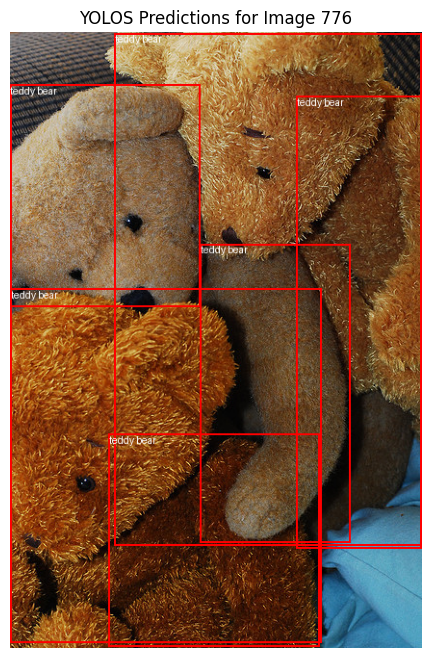

100%|██████████| 630/630 [02:26<00:00,  4.29it/s]


mAP@[0.5:0.95]: tensor(0.3836)
Detailed mAP results: {'map': tensor(0.3836), 'map_50': tensor(0.5588), 'map_75': tensor(0.4095), 'map_small': tensor(0.1200), 'map_medium': tensor(0.3416), 'map_large': tensor(0.5481), 'mar_1': tensor(0.3157), 'mar_10': tensor(0.4548), 'mar_100': tensor(0.4658), 'mar_small': tensor(0.1619), 'mar_medium': tensor(0.4280), 'mar_large': tensor(0.6242), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 3 - Validation mAP Score: 0.3836


map   map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.38359  0.55876  0.409504    0.11995     0.34156   0.548102  0.315676   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.454825  0.465763   0.161933    0.427982   0.624207           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3836 at epoch 3


  0%|          | 1/368 [00:02<13:07,  2.15s/it]

Epoch 4, Batch 0: Loss = 1.0152


  3%|▎         | 11/368 [00:41<24:21,  4.09s/it]

Epoch 4, Batch 10: Loss = 0.9279


  6%|▌         | 21/368 [01:18<20:00,  3.46s/it]

Epoch 4, Batch 20: Loss = 1.1896


  8%|▊         | 31/368 [02:04<24:45,  4.41s/it]

Epoch 4, Batch 30: Loss = 1.3441


 11%|█         | 41/368 [02:49<23:55,  4.39s/it]

Epoch 4, Batch 40: Loss = 1.0380


 14%|█▍        | 51/368 [03:29<18:25,  3.49s/it]

Epoch 4, Batch 50: Loss = 1.2737


 17%|█▋        | 61/368 [04:07<21:41,  4.24s/it]

Epoch 4, Batch 60: Loss = 1.0260


 19%|█▉        | 71/368 [04:44<19:52,  4.02s/it]

Epoch 4, Batch 70: Loss = 0.9946


 22%|██▏       | 81/368 [05:28<22:22,  4.68s/it]

Epoch 4, Batch 80: Loss = 0.8463


 25%|██▍       | 91/368 [06:07<17:20,  3.76s/it]

Epoch 4, Batch 90: Loss = 1.1635


 27%|██▋       | 101/368 [06:53<19:27,  4.37s/it]

Epoch 4, Batch 100: Loss = 0.9511


 30%|███       | 111/368 [07:37<21:45,  5.08s/it]

Epoch 4, Batch 110: Loss = 0.9507


 33%|███▎      | 121/368 [08:20<17:11,  4.18s/it]

Epoch 4, Batch 120: Loss = 1.1613


 36%|███▌      | 131/368 [09:00<16:03,  4.07s/it]

Epoch 4, Batch 130: Loss = 0.8382


 38%|███▊      | 141/368 [09:41<16:25,  4.34s/it]

Epoch 4, Batch 140: Loss = 1.1274


 41%|████      | 151/368 [10:28<18:44,  5.18s/it]

Epoch 4, Batch 150: Loss = 0.7218


 44%|████▍     | 161/368 [11:04<13:36,  3.94s/it]

Epoch 4, Batch 160: Loss = 1.1203


 46%|████▋     | 171/368 [11:48<12:28,  3.80s/it]

Epoch 4, Batch 170: Loss = 1.0276


 49%|████▉     | 181/368 [12:22<10:18,  3.31s/it]

Epoch 4, Batch 180: Loss = 1.0374


 52%|█████▏    | 191/368 [13:05<10:48,  3.67s/it]

Epoch 4, Batch 190: Loss = 0.7739


 55%|█████▍    | 201/368 [13:40<09:14,  3.32s/it]

Epoch 4, Batch 200: Loss = 1.2292


 57%|█████▋    | 211/368 [14:20<10:25,  3.99s/it]

Epoch 4, Batch 210: Loss = 1.0878


 60%|██████    | 221/368 [14:58<10:06,  4.13s/it]

Epoch 4, Batch 220: Loss = 1.1771


 63%|██████▎   | 231/368 [15:44<11:01,  4.83s/it]

Epoch 4, Batch 230: Loss = 1.2139


 65%|██████▌   | 241/368 [16:21<07:53,  3.73s/it]

Epoch 4, Batch 240: Loss = 1.2571


 68%|██████▊   | 251/368 [17:02<08:29,  4.35s/it]

Epoch 4, Batch 250: Loss = 1.0801


 71%|███████   | 261/368 [17:46<07:09,  4.02s/it]

Epoch 4, Batch 260: Loss = 0.7732


 74%|███████▎  | 271/368 [18:23<05:35,  3.46s/it]

Epoch 4, Batch 270: Loss = 1.2316


 76%|███████▋  | 281/368 [19:06<06:24,  4.42s/it]

Epoch 4, Batch 280: Loss = 1.4122


 79%|███████▉  | 291/368 [19:42<04:09,  3.24s/it]

Epoch 4, Batch 290: Loss = 1.0037


 82%|████████▏ | 301/368 [20:28<04:48,  4.31s/it]

Epoch 4, Batch 300: Loss = 0.7811


 85%|████████▍ | 311/368 [21:06<04:01,  4.24s/it]

Epoch 4, Batch 310: Loss = 0.9740


 87%|████████▋ | 321/368 [21:50<03:12,  4.09s/it]

Epoch 4, Batch 320: Loss = 1.0944


 90%|████████▉ | 331/368 [22:30<02:21,  3.83s/it]

Epoch 4, Batch 330: Loss = 0.8419


 93%|█████████▎| 341/368 [23:13<01:57,  4.34s/it]

Epoch 4, Batch 340: Loss = 1.1922


 95%|█████████▌| 351/368 [23:52<00:59,  3.49s/it]

Epoch 4, Batch 350: Loss = 0.8887


 98%|█████████▊| 361/368 [24:34<00:31,  4.57s/it]

Epoch 4, Batch 360: Loss = 0.9797


100%|██████████| 368/368 [24:57<00:00,  4.07s/it]


Epoch 4 Complete. Average train Loss: 4.2822, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:58<00:00,  1.13s/it]


Epoch 4 - Validation Loss: 4.2404


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.938 at location [0.98, 266.87, 323.4, 634.97]
Detected teddy bear with confidence 0.865 at location [197.61, 220.4, 353.18, 530.66]
Detected teddy bear with confidence 0.626 at location [297.8, 66.67, 427.94, 536.52]
Detected teddy bear with confidence 0.967 at location [108.97, 1.43, 427.56, 533.98]
Detected teddy bear with confidence 0.984 at location [0.1, 54.7, 197.79, 285.77]
Detected teddy bear with confidence 0.533 at location [102.87, 417.78, 321.24, 638.76]


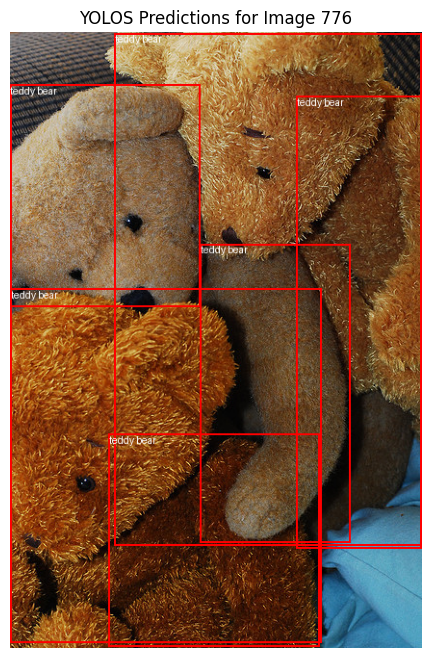

100%|██████████| 630/630 [02:27<00:00,  4.28it/s]


mAP@[0.5:0.95]: tensor(0.3848)
Detailed mAP results: {'map': tensor(0.3848), 'map_50': tensor(0.5605), 'map_75': tensor(0.4114), 'map_small': tensor(0.1218), 'map_medium': tensor(0.3412), 'map_large': tensor(0.5484), 'mar_1': tensor(0.3156), 'mar_10': tensor(0.4570), 'mar_100': tensor(0.4681), 'mar_small': tensor(0.1681), 'mar_medium': tensor(0.4300), 'mar_large': tensor(0.6248), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 4 - Validation mAP Score: 0.3848


map    map_50   map_75  map_small  map_medium  map_large     mar_1  \
0  0.384827  0.560478  0.41144   0.121807    0.341225   0.548403  0.315648   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.456967  0.468066   0.168062    0.430008   0.624801           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3848 at epoch 4


  0%|          | 1/368 [00:03<20:18,  3.32s/it]

Epoch 5, Batch 0: Loss = 0.9513


  3%|▎         | 11/368 [00:52<29:06,  4.89s/it]

Epoch 5, Batch 10: Loss = 1.1884


  6%|▌         | 21/368 [01:34<24:14,  4.19s/it]

Epoch 5, Batch 20: Loss = 1.0756


  8%|▊         | 31/368 [02:12<18:10,  3.24s/it]

Epoch 5, Batch 30: Loss = 0.8978


 11%|█         | 41/368 [02:54<24:25,  4.48s/it]

Epoch 5, Batch 40: Loss = 0.9733


 14%|█▍        | 51/368 [03:39<26:21,  4.99s/it]

Epoch 5, Batch 50: Loss = 1.1038


 17%|█▋        | 61/368 [04:18<22:40,  4.43s/it]

Epoch 5, Batch 60: Loss = 1.0938


 19%|█▉        | 71/368 [05:00<21:47,  4.40s/it]

Epoch 5, Batch 70: Loss = 1.1331


 22%|██▏       | 81/368 [05:44<19:15,  4.02s/it]

Epoch 5, Batch 80: Loss = 1.1164


 25%|██▍       | 91/368 [06:26<18:05,  3.92s/it]

Epoch 5, Batch 90: Loss = 0.8635


 27%|██▋       | 101/368 [07:14<22:37,  5.09s/it]

Epoch 5, Batch 100: Loss = 1.2342


 30%|███       | 111/368 [07:58<18:57,  4.43s/it]

Epoch 5, Batch 110: Loss = 0.8977


 33%|███▎      | 121/368 [08:38<17:39,  4.29s/it]

Epoch 5, Batch 120: Loss = 0.8597


 36%|███▌      | 131/368 [09:13<13:47,  3.49s/it]

Epoch 5, Batch 130: Loss = 1.1090


 38%|███▊      | 141/368 [09:53<14:15,  3.77s/it]

Epoch 5, Batch 140: Loss = 1.3618


 41%|████      | 151/368 [10:29<12:34,  3.47s/it]

Epoch 5, Batch 150: Loss = 0.8860


 44%|████▍     | 161/368 [11:18<16:34,  4.80s/it]

Epoch 5, Batch 160: Loss = 0.9536


 46%|████▋     | 171/368 [12:00<14:13,  4.33s/it]

Epoch 5, Batch 170: Loss = 1.0484


 49%|████▉     | 181/368 [12:35<11:24,  3.66s/it]

Epoch 5, Batch 180: Loss = 1.1309


 52%|█████▏    | 191/368 [13:08<10:10,  3.45s/it]

Epoch 5, Batch 190: Loss = 1.0849


 55%|█████▍    | 201/368 [13:47<10:40,  3.84s/it]

Epoch 5, Batch 200: Loss = 1.0246


 57%|█████▋    | 211/368 [14:30<09:54,  3.79s/it]

Epoch 5, Batch 210: Loss = 1.3189


 60%|██████    | 221/368 [15:15<12:08,  4.96s/it]

Epoch 5, Batch 220: Loss = 1.0662


 63%|██████▎   | 231/368 [15:56<11:35,  5.07s/it]

Epoch 5, Batch 230: Loss = 1.0941


 65%|██████▌   | 241/368 [16:37<08:20,  3.94s/it]

Epoch 5, Batch 240: Loss = 0.8768


 68%|██████▊   | 251/368 [17:21<08:10,  4.19s/it]

Epoch 5, Batch 250: Loss = 1.2632


 71%|███████   | 261/368 [18:03<07:08,  4.00s/it]

Epoch 5, Batch 260: Loss = 0.9500


 74%|███████▎  | 271/368 [18:41<06:20,  3.93s/it]

Epoch 5, Batch 270: Loss = 1.1031


 76%|███████▋  | 281/368 [19:21<05:21,  3.69s/it]

Epoch 5, Batch 280: Loss = 0.9922


 79%|███████▉  | 291/368 [20:07<06:06,  4.76s/it]

Epoch 5, Batch 290: Loss = 1.0725


 82%|████████▏ | 301/368 [20:51<04:44,  4.24s/it]

Epoch 5, Batch 300: Loss = 1.4601


 85%|████████▍ | 311/368 [21:29<03:42,  3.90s/it]

Epoch 5, Batch 310: Loss = 0.9293


 87%|████████▋ | 321/368 [22:09<02:54,  3.71s/it]

Epoch 5, Batch 320: Loss = 1.2543


 90%|████████▉ | 331/368 [22:48<02:17,  3.72s/it]

Epoch 5, Batch 330: Loss = 1.0054


 93%|█████████▎| 341/368 [23:33<02:04,  4.61s/it]

Epoch 5, Batch 340: Loss = 1.0215


 95%|█████████▌| 351/368 [24:09<00:59,  3.48s/it]

Epoch 5, Batch 350: Loss = 0.8350


 98%|█████████▊| 361/368 [24:49<00:24,  3.43s/it]

Epoch 5, Batch 360: Loss = 0.9238


100%|██████████| 368/368 [25:21<00:00,  4.13s/it]


Epoch 5 Complete. Average train Loss: 4.2474, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:58<00:00,  1.13s/it]


Epoch 5 - Validation Loss: 4.2093


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.938 at location [0.98, 266.81, 323.39, 634.98]
Detected teddy bear with confidence 0.873 at location [197.65, 220.36, 353.15, 530.69]
Detected teddy bear with confidence 0.633 at location [297.8, 66.73, 427.95, 536.56]
Detected teddy bear with confidence 0.967 at location [108.99, 1.43, 427.57, 534.0]
Detected teddy bear with confidence 0.984 at location [0.09, 54.75, 197.76, 285.86]
Detected teddy bear with confidence 0.543 at location [102.87, 417.73, 321.24, 638.76]


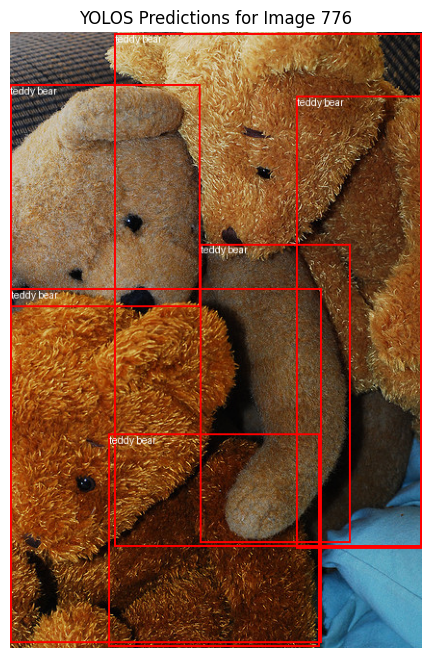

100%|██████████| 630/630 [02:27<00:00,  4.28it/s]


mAP@[0.5:0.95]: tensor(0.3856)
Detailed mAP results: {'map': tensor(0.3856), 'map_50': tensor(0.5617), 'map_75': tensor(0.4119), 'map_small': tensor(0.1274), 'map_medium': tensor(0.3404), 'map_large': tensor(0.5489), 'mar_1': tensor(0.3165), 'mar_10': tensor(0.4579), 'mar_100': tensor(0.4693), 'mar_small': tensor(0.1787), 'mar_medium': tensor(0.4300), 'mar_large': tensor(0.6261), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 5 - Validation mAP Score: 0.3856


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.385563  0.561692  0.411927   0.127403    0.340413   0.548942  0.316532   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.457878  0.469338   0.178748     0.42996   0.626105           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3856 at epoch 5


  0%|          | 1/368 [00:02<16:39,  2.72s/it]

Epoch 6, Batch 0: Loss = 1.1951


  3%|▎         | 11/368 [00:47<28:35,  4.80s/it]

Epoch 6, Batch 10: Loss = 0.7879


  6%|▌         | 21/368 [01:35<27:25,  4.74s/it]

Epoch 6, Batch 20: Loss = 0.9148


  8%|▊         | 31/368 [02:10<20:37,  3.67s/it]

Epoch 6, Batch 30: Loss = 1.0295


 11%|█         | 41/368 [02:53<23:10,  4.25s/it]

Epoch 6, Batch 40: Loss = 1.2412


 14%|█▍        | 51/368 [03:38<26:17,  4.98s/it]

Epoch 6, Batch 50: Loss = 1.0938


 17%|█▋        | 61/368 [04:23<21:43,  4.25s/it]

Epoch 6, Batch 60: Loss = 0.9156


 19%|█▉        | 71/368 [04:59<17:45,  3.59s/it]

Epoch 6, Batch 70: Loss = 0.9685


 22%|██▏       | 81/368 [05:43<21:30,  4.49s/it]

Epoch 6, Batch 80: Loss = 0.8603


 25%|██▍       | 91/368 [06:29<20:06,  4.36s/it]

Epoch 6, Batch 90: Loss = 1.0941


 27%|██▋       | 101/368 [07:10<16:54,  3.80s/it]

Epoch 6, Batch 100: Loss = 1.0641


 30%|███       | 111/368 [07:45<17:11,  4.01s/it]

Epoch 6, Batch 110: Loss = 0.7879


 33%|███▎      | 121/368 [08:25<17:47,  4.32s/it]

Epoch 6, Batch 120: Loss = 1.0606


 36%|███▌      | 131/368 [09:02<15:26,  3.91s/it]

Epoch 6, Batch 130: Loss = 1.0186


 38%|███▊      | 141/368 [09:41<13:19,  3.52s/it]

Epoch 6, Batch 140: Loss = 0.9350


 41%|████      | 151/368 [10:24<13:44,  3.80s/it]

Epoch 6, Batch 150: Loss = 1.1961


 44%|████▍     | 161/368 [11:04<13:06,  3.80s/it]

Epoch 6, Batch 160: Loss = 1.1249


 46%|████▋     | 171/368 [11:45<12:01,  3.66s/it]

Epoch 6, Batch 170: Loss = 0.9384


 49%|████▉     | 181/368 [12:30<15:33,  4.99s/it]

Epoch 6, Batch 180: Loss = 1.0244


 52%|█████▏    | 191/368 [13:14<13:53,  4.71s/it]

Epoch 6, Batch 190: Loss = 1.0587


 55%|█████▍    | 201/368 [14:01<13:42,  4.92s/it]

Epoch 6, Batch 200: Loss = 0.9344


 57%|█████▋    | 211/368 [14:45<10:43,  4.10s/it]

Epoch 6, Batch 210: Loss = 1.2345


 60%|██████    | 221/368 [15:25<08:23,  3.43s/it]

Epoch 6, Batch 220: Loss = 1.0063


 63%|██████▎   | 231/368 [16:05<10:12,  4.47s/it]

Epoch 6, Batch 230: Loss = 0.9004


 65%|██████▌   | 241/368 [16:51<09:10,  4.34s/it]

Epoch 6, Batch 240: Loss = 0.8697


 68%|██████▊   | 251/368 [17:25<06:18,  3.24s/it]

Epoch 6, Batch 250: Loss = 1.2026


 71%|███████   | 261/368 [18:07<06:19,  3.55s/it]

Epoch 6, Batch 260: Loss = 0.9558


 74%|███████▎  | 271/368 [18:46<07:10,  4.44s/it]

Epoch 6, Batch 270: Loss = 1.2068


 76%|███████▋  | 281/368 [19:31<06:58,  4.82s/it]

Epoch 6, Batch 280: Loss = 0.8899


 79%|███████▉  | 291/368 [20:06<04:31,  3.52s/it]

Epoch 6, Batch 290: Loss = 1.1278


 82%|████████▏ | 301/368 [20:49<05:11,  4.64s/it]

Epoch 6, Batch 300: Loss = 0.9054


 85%|████████▍ | 311/368 [21:30<03:55,  4.14s/it]

Epoch 6, Batch 310: Loss = 1.0674


 87%|████████▋ | 321/368 [22:09<02:56,  3.76s/it]

Epoch 6, Batch 320: Loss = 1.1648


 90%|████████▉ | 331/368 [22:51<02:41,  4.37s/it]

Epoch 6, Batch 330: Loss = 0.9392


 93%|█████████▎| 341/368 [23:35<02:11,  4.87s/it]

Epoch 6, Batch 340: Loss = 0.8987


 95%|█████████▌| 351/368 [24:17<01:14,  4.35s/it]

Epoch 6, Batch 350: Loss = 1.3314


 98%|█████████▊| 361/368 [24:59<00:28,  4.07s/it]

Epoch 6, Batch 360: Loss = 1.1101


100%|██████████| 368/368 [25:24<00:00,  4.14s/it]


Epoch 6 Complete. Average train Loss: 4.2040, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:58<00:00,  1.13s/it]


Epoch 6 - Validation Loss: 4.1788


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.98, 266.76, 323.37, 634.99]
Detected teddy bear with confidence 0.504 at location [303.52, 65.63, 427.7, 413.4]
Detected teddy bear with confidence 0.879 at location [197.69, 220.31, 353.13, 530.71]
Detected teddy bear with confidence 0.64 at location [297.8, 66.79, 427.95, 536.6]
Detected teddy bear with confidence 0.966 at location [109.01, 1.43, 427.57, 534.02]
Detected teddy bear with confidence 0.985 at location [0.08, 54.79, 197.74, 285.95]
Detected teddy bear with confidence 0.553 at location [102.86, 417.69, 321.24, 638.76]


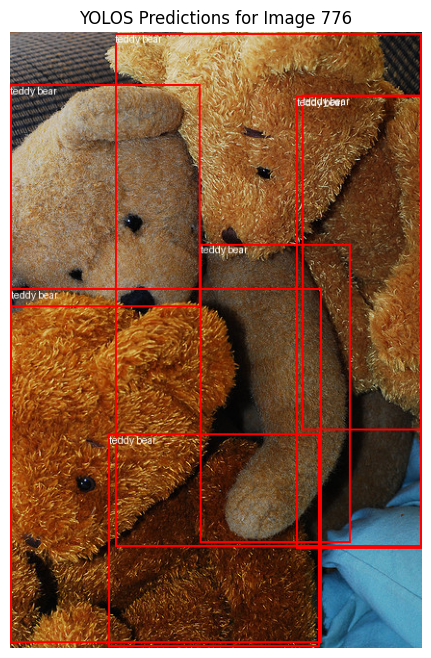

100%|██████████| 630/630 [02:27<00:00,  4.27it/s]


mAP@[0.5:0.95]: tensor(0.3860)
Detailed mAP results: {'map': tensor(0.3860), 'map_50': tensor(0.5618), 'map_75': tensor(0.4130), 'map_small': tensor(0.1277), 'map_medium': tensor(0.3408), 'map_large': tensor(0.5496), 'mar_1': tensor(0.3167), 'mar_10': tensor(0.4589), 'mar_100': tensor(0.4704), 'mar_small': tensor(0.1791), 'mar_medium': tensor(0.4317), 'mar_large': tensor(0.6271), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 6 - Validation mAP Score: 0.3860


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.386021  0.561789  0.412963    0.12774    0.340822   0.549606  0.316658   

    mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.45891  0.470429    0.17906    0.431716   0.627123           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3860 at epoch 6


  0%|          | 1/368 [00:03<20:15,  3.31s/it]

Epoch 7, Batch 0: Loss = 0.9854


  3%|▎         | 11/368 [00:44<26:19,  4.42s/it]

Epoch 7, Batch 10: Loss = 0.8031


  6%|▌         | 21/368 [01:22<19:57,  3.45s/it]

Epoch 7, Batch 20: Loss = 1.0692


  8%|▊         | 31/368 [02:04<22:49,  4.07s/it]

Epoch 7, Batch 30: Loss = 1.0874


 11%|█         | 41/368 [02:52<25:00,  4.59s/it]

Epoch 7, Batch 40: Loss = 0.9522


 14%|█▍        | 51/368 [03:34<27:19,  5.17s/it]

Epoch 7, Batch 50: Loss = 0.9292


 17%|█▋        | 61/368 [04:16<19:43,  3.86s/it]

Epoch 7, Batch 60: Loss = 1.0165


 19%|█▉        | 71/368 [05:00<22:15,  4.50s/it]

Epoch 7, Batch 70: Loss = 1.3182


 22%|██▏       | 81/368 [05:38<17:46,  3.72s/it]

Epoch 7, Batch 80: Loss = 0.8725


 25%|██▍       | 91/368 [06:17<16:35,  3.59s/it]

Epoch 7, Batch 90: Loss = 1.3076


 27%|██▋       | 101/368 [07:01<21:44,  4.88s/it]

Epoch 7, Batch 100: Loss = 0.9633


 30%|███       | 111/368 [07:41<18:40,  4.36s/it]

Epoch 7, Batch 110: Loss = 1.1514


 33%|███▎      | 121/368 [08:33<21:24,  5.20s/it]

Epoch 7, Batch 120: Loss = 0.9415


 36%|███▌      | 131/368 [09:12<16:30,  4.18s/it]

Epoch 7, Batch 130: Loss = 0.8564


 38%|███▊      | 141/368 [09:57<18:33,  4.90s/it]

Epoch 7, Batch 140: Loss = 0.9005


 41%|████      | 151/368 [10:35<15:03,  4.16s/it]

Epoch 7, Batch 150: Loss = 1.0881


 44%|████▍     | 161/368 [11:17<13:53,  4.03s/it]

Epoch 7, Batch 160: Loss = 0.9755


 46%|████▋     | 171/368 [11:58<11:19,  3.45s/it]

Epoch 7, Batch 170: Loss = 0.8679


 49%|████▉     | 181/368 [12:38<11:48,  3.79s/it]

Epoch 7, Batch 180: Loss = 1.2165


 52%|█████▏    | 191/368 [13:18<13:38,  4.62s/it]

Epoch 7, Batch 190: Loss = 0.9642


 55%|█████▍    | 201/368 [13:58<11:15,  4.05s/it]

Epoch 7, Batch 200: Loss = 0.8787


 57%|█████▋    | 211/368 [14:41<09:29,  3.63s/it]

Epoch 7, Batch 210: Loss = 1.2316


 60%|██████    | 221/368 [15:20<08:52,  3.62s/it]

Epoch 7, Batch 220: Loss = 0.8973


 63%|██████▎   | 231/368 [15:58<08:21,  3.66s/it]

Epoch 7, Batch 230: Loss = 0.9911


 65%|██████▌   | 241/368 [16:36<08:26,  3.99s/it]

Epoch 7, Batch 240: Loss = 0.8635


 68%|██████▊   | 251/368 [17:14<07:06,  3.64s/it]

Epoch 7, Batch 250: Loss = 1.0803


 71%|███████   | 261/368 [17:56<07:38,  4.29s/it]

Epoch 7, Batch 260: Loss = 1.2466


 74%|███████▎  | 271/368 [18:32<05:56,  3.68s/it]

Epoch 7, Batch 270: Loss = 1.0568


 76%|███████▋  | 281/368 [19:10<05:35,  3.85s/it]

Epoch 7, Batch 280: Loss = 1.0057


 79%|███████▉  | 291/368 [19:51<05:47,  4.51s/it]

Epoch 7, Batch 290: Loss = 1.0674


 82%|████████▏ | 301/368 [20:33<04:04,  3.65s/it]

Epoch 7, Batch 300: Loss = 1.3288


 85%|████████▍ | 311/368 [21:14<03:45,  3.96s/it]

Epoch 7, Batch 310: Loss = 1.0307


 87%|████████▋ | 321/368 [22:00<02:51,  3.65s/it]

Epoch 7, Batch 320: Loss = 1.1715


 90%|████████▉ | 331/368 [22:39<02:26,  3.95s/it]

Epoch 7, Batch 330: Loss = 1.0953


 93%|█████████▎| 341/368 [23:16<01:35,  3.55s/it]

Epoch 7, Batch 340: Loss = 1.0603


 95%|█████████▌| 351/368 [23:57<00:58,  3.42s/it]

Epoch 7, Batch 350: Loss = 1.0241


 98%|█████████▊| 361/368 [24:45<00:34,  4.88s/it]

Epoch 7, Batch 360: Loss = 0.9076


100%|██████████| 368/368 [25:09<00:00,  4.10s/it]


Epoch 7 Complete. Average train Loss: 4.1835, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:01<00:00,  1.15s/it]


Epoch 7 - Validation Loss: 4.1549


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.97, 266.71, 323.36, 635.0]
Detected teddy bear with confidence 0.515 at location [303.51, 65.69, 427.7, 413.45]
Detected teddy bear with confidence 0.884 at location [197.73, 220.28, 353.11, 530.73]
Detected teddy bear with confidence 0.645 at location [297.8, 66.84, 427.95, 536.63]
Detected teddy bear with confidence 0.966 at location [109.03, 1.43, 427.57, 534.03]
Detected teddy bear with confidence 0.985 at location [0.07, 54.83, 197.72, 286.01]
Detected teddy bear with confidence 0.56 at location [102.86, 417.66, 321.24, 638.75]


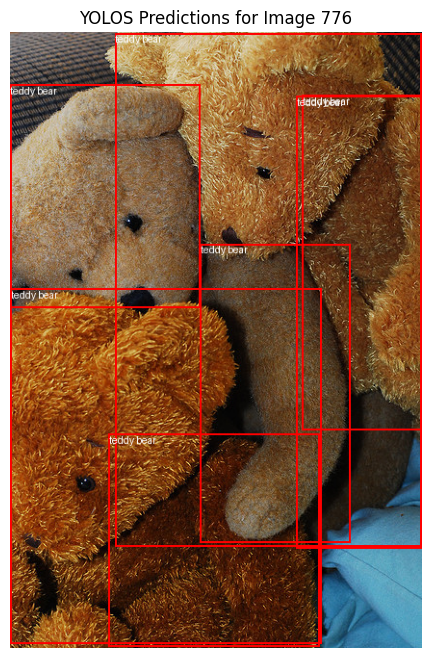

100%|██████████| 630/630 [02:27<00:00,  4.28it/s]


mAP@[0.5:0.95]: tensor(0.3866)
Detailed mAP results: {'map': tensor(0.3866), 'map_50': tensor(0.5620), 'map_75': tensor(0.4137), 'map_small': tensor(0.1290), 'map_medium': tensor(0.3410), 'map_large': tensor(0.5519), 'mar_1': tensor(0.3172), 'mar_10': tensor(0.4595), 'mar_100': tensor(0.4714), 'mar_small': tensor(0.1798), 'mar_medium': tensor(0.4323), 'mar_large': tensor(0.6314), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 7 - Validation mAP Score: 0.3866


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.38662  0.562001  0.413676   0.128989    0.341016   0.551896  0.317203   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.459545  0.471383   0.179803    0.432348   0.631364           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3866 at epoch 7


  0%|          | 1/368 [00:04<27:20,  4.47s/it]

Epoch 8, Batch 0: Loss = 0.9739


  3%|▎         | 11/368 [00:46<28:31,  4.79s/it]

Epoch 8, Batch 10: Loss = 1.0875


  6%|▌         | 21/368 [01:24<27:03,  4.68s/it]

Epoch 8, Batch 20: Loss = 1.0341


  8%|▊         | 31/368 [02:07<29:07,  5.19s/it]

Epoch 8, Batch 30: Loss = 1.0612


 11%|█         | 41/368 [02:47<23:48,  4.37s/it]

Epoch 8, Batch 40: Loss = 1.0601


 14%|█▍        | 51/368 [03:34<20:45,  3.93s/it]

Epoch 8, Batch 50: Loss = 1.0933


 17%|█▋        | 61/368 [04:14<23:12,  4.54s/it]

Epoch 8, Batch 60: Loss = 1.1676


 19%|█▉        | 71/368 [04:55<21:12,  4.28s/it]

Epoch 8, Batch 70: Loss = 1.0935


 22%|██▏       | 81/368 [05:33<19:48,  4.14s/it]

Epoch 8, Batch 80: Loss = 1.1603


 25%|██▍       | 91/368 [06:17<21:53,  4.74s/it]

Epoch 8, Batch 90: Loss = 0.8114


 27%|██▋       | 101/368 [06:54<16:58,  3.81s/it]

Epoch 8, Batch 100: Loss = 1.1973


 30%|███       | 111/368 [07:40<18:06,  4.23s/it]

Epoch 8, Batch 110: Loss = 1.0947


 33%|███▎      | 121/368 [08:24<16:29,  4.01s/it]

Epoch 8, Batch 120: Loss = 0.9162


 36%|███▌      | 131/368 [09:08<15:52,  4.02s/it]

Epoch 8, Batch 130: Loss = 1.1164


 38%|███▊      | 141/368 [09:57<19:24,  5.13s/it]

Epoch 8, Batch 140: Loss = 0.9450


 41%|████      | 151/368 [10:44<17:11,  4.75s/it]

Epoch 8, Batch 150: Loss = 1.2221


 44%|████▍     | 161/368 [11:22<12:16,  3.56s/it]

Epoch 8, Batch 160: Loss = 0.8098


 46%|████▋     | 171/368 [11:59<10:50,  3.30s/it]

Epoch 8, Batch 170: Loss = 0.9695


 49%|████▉     | 181/368 [12:35<09:57,  3.19s/it]

Epoch 8, Batch 180: Loss = 1.0000


 52%|█████▏    | 191/368 [13:10<10:41,  3.63s/it]

Epoch 8, Batch 190: Loss = 1.2780


 55%|█████▍    | 201/368 [13:51<09:55,  3.56s/it]

Epoch 8, Batch 200: Loss = 0.9546


 57%|█████▋    | 211/368 [14:31<10:01,  3.83s/it]

Epoch 8, Batch 210: Loss = 0.9302


 60%|██████    | 221/368 [15:16<10:38,  4.34s/it]

Epoch 8, Batch 220: Loss = 1.4229


 63%|██████▎   | 231/368 [16:01<09:32,  4.18s/it]

Epoch 8, Batch 230: Loss = 1.1062


 65%|██████▌   | 241/368 [16:40<09:01,  4.26s/it]

Epoch 8, Batch 240: Loss = 1.0477


 68%|██████▊   | 251/368 [17:18<07:30,  3.85s/it]

Epoch 8, Batch 250: Loss = 1.0063


 71%|███████   | 261/368 [18:01<06:47,  3.80s/it]

Epoch 8, Batch 260: Loss = 0.8847


 74%|███████▎  | 271/368 [18:44<07:03,  4.36s/it]

Epoch 8, Batch 270: Loss = 1.0676


 76%|███████▋  | 281/368 [19:25<06:00,  4.14s/it]

Epoch 8, Batch 280: Loss = 1.1137


 79%|███████▉  | 291/368 [20:04<04:25,  3.45s/it]

Epoch 8, Batch 290: Loss = 1.0974


 82%|████████▏ | 301/368 [20:39<04:06,  3.68s/it]

Epoch 8, Batch 300: Loss = 0.9396


 85%|████████▍ | 311/368 [21:20<04:20,  4.58s/it]

Epoch 8, Batch 310: Loss = 0.7622


 87%|████████▋ | 321/368 [22:01<03:25,  4.38s/it]

Epoch 8, Batch 320: Loss = 0.9315


 90%|████████▉ | 331/368 [22:36<02:08,  3.46s/it]

Epoch 8, Batch 330: Loss = 1.1640


 93%|█████████▎| 341/368 [23:11<01:51,  4.13s/it]

Epoch 8, Batch 340: Loss = 1.1315


 95%|█████████▌| 351/368 [23:55<01:11,  4.19s/it]

Epoch 8, Batch 350: Loss = 1.1365


 98%|█████████▊| 361/368 [24:29<00:24,  3.54s/it]

Epoch 8, Batch 360: Loss = 1.0820


100%|██████████| 368/368 [24:53<00:00,  4.06s/it]


Epoch 8 Complete. Average train Loss: 4.1782, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 8 - Validation Loss: 4.1395


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.97, 266.68, 323.35, 635.0]
Detected teddy bear with confidence 0.521 at location [303.5, 65.72, 427.7, 413.48]
Detected teddy bear with confidence 0.887 at location [197.75, 220.26, 353.09, 530.75]
Detected teddy bear with confidence 0.648 at location [297.8, 66.87, 427.95, 536.65]
Detected teddy bear with confidence 0.966 at location [109.04, 1.43, 427.57, 534.04]
Detected teddy bear with confidence 0.985 at location [0.07, 54.85, 197.71, 286.06]
Detected teddy bear with confidence 0.565 at location [102.85, 417.64, 321.25, 638.75]


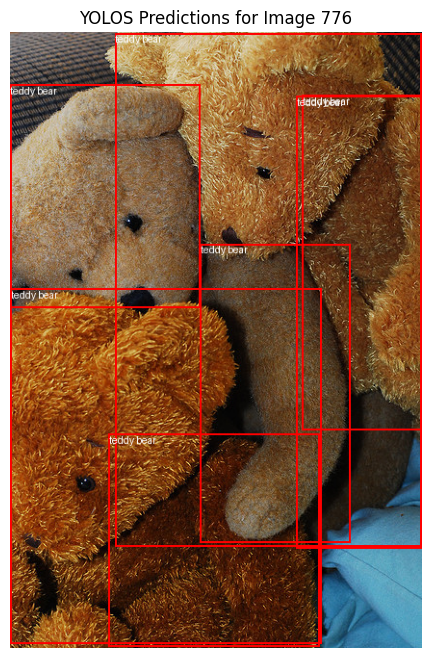

100%|██████████| 630/630 [02:27<00:00,  4.29it/s]


mAP@[0.5:0.95]: tensor(0.3866)
Detailed mAP results: {'map': tensor(0.3866), 'map_50': tensor(0.5623), 'map_75': tensor(0.4138), 'map_small': tensor(0.1290), 'map_medium': tensor(0.3397), 'map_large': tensor(0.5514), 'mar_1': tensor(0.3171), 'mar_10': tensor(0.4594), 'mar_100': tensor(0.4713), 'mar_small': tensor(0.1803), 'mar_medium': tensor(0.4311), 'mar_large': tensor(0.6312), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 8 - Validation mAP Score: 0.3866


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.386582  0.562343  0.413843   0.128989    0.339692   0.551394  0.317059   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.459419  0.471296   0.180284    0.431127   0.631167           -1.0   

   mar_100_per_class  
0               -1.0

  0%|          | 1/368 [00:07<43:53,  7.18s/it]

Epoch 9, Batch 0: Loss = 1.1980


  3%|▎         | 11/368 [00:49<21:52,  3.68s/it]

Epoch 9, Batch 10: Loss = 0.6904


  6%|▌         | 21/368 [01:29<23:25,  4.05s/it]

Epoch 9, Batch 20: Loss = 0.9625


  8%|▊         | 31/368 [02:08<21:40,  3.86s/it]

Epoch 9, Batch 30: Loss = 1.0918


 11%|█         | 41/368 [02:45<21:31,  3.95s/it]

Epoch 9, Batch 40: Loss = 1.0338


 14%|█▍        | 51/368 [03:28<21:36,  4.09s/it]

Epoch 9, Batch 50: Loss = 1.1716


 17%|█▋        | 61/368 [04:09<20:41,  4.05s/it]

Epoch 9, Batch 60: Loss = 1.1017


 19%|█▉        | 71/368 [04:55<21:17,  4.30s/it]

Epoch 9, Batch 70: Loss = 1.0794


 22%|██▏       | 81/368 [05:40<22:22,  4.68s/it]

Epoch 9, Batch 80: Loss = 0.9981


 25%|██▍       | 91/368 [06:23<21:13,  4.60s/it]

Epoch 9, Batch 90: Loss = 1.0481


 27%|██▋       | 101/368 [07:08<20:30,  4.61s/it]

Epoch 9, Batch 100: Loss = 1.0220


 30%|███       | 111/368 [07:54<21:01,  4.91s/it]

Epoch 9, Batch 110: Loss = 0.7779


 33%|███▎      | 121/368 [08:34<17:47,  4.32s/it]

Epoch 9, Batch 120: Loss = 0.9979


 36%|███▌      | 131/368 [09:16<16:36,  4.20s/it]

Epoch 9, Batch 130: Loss = 1.1175


 38%|███▊      | 141/368 [10:00<16:02,  4.24s/it]

Epoch 9, Batch 140: Loss = 1.2507


 41%|████      | 151/368 [10:40<13:38,  3.77s/it]

Epoch 9, Batch 150: Loss = 1.2118


 44%|████▍     | 161/368 [11:20<13:50,  4.01s/it]

Epoch 9, Batch 160: Loss = 1.2018


 46%|████▋     | 171/368 [12:05<15:37,  4.76s/it]

Epoch 9, Batch 170: Loss = 1.3554


 49%|████▉     | 181/368 [12:47<15:01,  4.82s/it]

Epoch 9, Batch 180: Loss = 1.1841


 52%|█████▏    | 191/368 [13:24<12:18,  4.17s/it]

Epoch 9, Batch 190: Loss = 1.2687


 55%|█████▍    | 201/368 [14:03<08:56,  3.21s/it]

Epoch 9, Batch 200: Loss = 0.9960


 57%|█████▋    | 211/368 [14:45<10:25,  3.98s/it]

Epoch 9, Batch 210: Loss = 1.4307


 60%|██████    | 221/368 [15:27<10:18,  4.21s/it]

Epoch 9, Batch 220: Loss = 1.0419


 63%|██████▎   | 231/368 [16:03<09:00,  3.95s/it]

Epoch 9, Batch 230: Loss = 1.0989


 65%|██████▌   | 241/368 [16:46<09:37,  4.55s/it]

Epoch 9, Batch 240: Loss = 1.0458


 68%|██████▊   | 251/368 [17:21<05:52,  3.02s/it]

Epoch 9, Batch 250: Loss = 0.9263


 71%|███████   | 261/368 [18:01<07:53,  4.42s/it]

Epoch 9, Batch 260: Loss = 0.9690


 74%|███████▎  | 271/368 [18:42<06:30,  4.03s/it]

Epoch 9, Batch 270: Loss = 1.0571


 76%|███████▋  | 281/368 [19:21<05:22,  3.70s/it]

Epoch 9, Batch 280: Loss = 1.0031


 79%|███████▉  | 291/368 [19:58<04:45,  3.71s/it]

Epoch 9, Batch 290: Loss = 1.3195


 82%|████████▏ | 301/368 [20:40<04:52,  4.37s/it]

Epoch 9, Batch 300: Loss = 0.9115


 85%|████████▍ | 311/368 [21:23<03:42,  3.90s/it]

Epoch 9, Batch 310: Loss = 1.0116


 87%|████████▋ | 321/368 [21:58<02:56,  3.76s/it]

Epoch 9, Batch 320: Loss = 0.9808


 90%|████████▉ | 331/368 [22:40<02:40,  4.35s/it]

Epoch 9, Batch 330: Loss = 0.9565


 93%|█████████▎| 341/368 [23:17<01:45,  3.89s/it]

Epoch 9, Batch 340: Loss = 1.0570


 95%|█████████▌| 351/368 [23:59<01:20,  4.76s/it]

Epoch 9, Batch 350: Loss = 1.2583


 98%|█████████▊| 361/368 [24:33<00:24,  3.48s/it]

Epoch 9, Batch 360: Loss = 0.9884


100%|██████████| 368/368 [25:03<00:00,  4.08s/it]


Epoch 9 Complete. Average train Loss: 4.1519, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:01<00:00,  1.15s/it]


Epoch 9 - Validation Loss: 4.1314


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.97, 266.66, 323.35, 635.0]
Detected teddy bear with confidence 0.525 at location [303.5, 65.74, 427.7, 413.5]
Detected teddy bear with confidence 0.889 at location [197.76, 220.24, 353.09, 530.76]
Detected teddy bear with confidence 0.65 at location [297.8, 66.88, 427.95, 536.66]
Detected teddy bear with confidence 0.966 at location [109.05, 1.43, 427.57, 534.05]
Detected teddy bear with confidence 0.985 at location [0.07, 54.87, 197.7, 286.09]
Detected teddy bear with confidence 0.568 at location [102.85, 417.62, 321.25, 638.75]


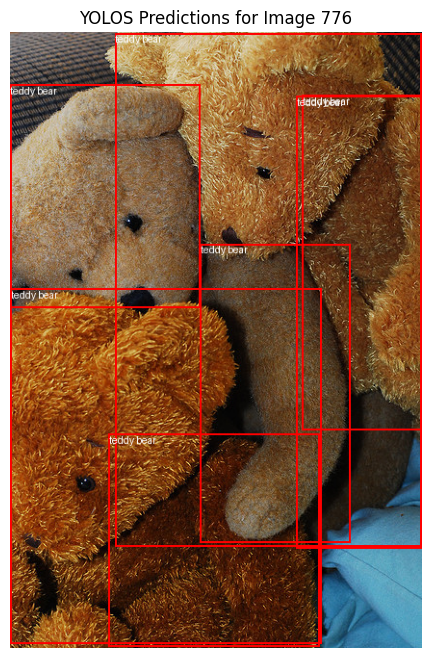

100%|██████████| 630/630 [02:27<00:00,  4.27it/s]


mAP@[0.5:0.95]: tensor(0.3869)
Detailed mAP results: {'map': tensor(0.3869), 'map_50': tensor(0.5625), 'map_75': tensor(0.4150), 'map_small': tensor(0.1290), 'map_medium': tensor(0.3397), 'map_large': tensor(0.5517), 'mar_1': tensor(0.3170), 'mar_10': tensor(0.4598), 'mar_100': tensor(0.4716), 'mar_small': tensor(0.1802), 'mar_medium': tensor(0.4309), 'mar_large': tensor(0.6319), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 9 - Validation mAP Score: 0.3869


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.386879  0.562545  0.415015   0.128983    0.339661   0.551742  0.317012   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.459763  0.471591   0.180161    0.430882   0.631933           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3869 at epoch 9
Early stopping triggered - Training Stopped!


In [ ]:
# Train Setting
epochs = 10
optimizer = torch.optim.AdamW(adalora_parameters, lr=3e-5, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)
early_stopping = EarlyStopping(patience=3)

# Train the AdaLoRA model
best_mAP_scores_AdaLoRA, epochs_list_AdaLoRA, train_total_losses_AdaLoRA, val_total_losses_AdaLoRA, train_focal_losses_AdaLoRA, train_bbox_losses_AdaLoRA, train_giou_losses_AdaLoRA, mAP_scores_AdaLoRA = train_model(
    model_with_AdaLoRA, processor, train_dataloader, val_dataloader, optimizer, scheduler, early_stopping, device, "adalora_model.pth", epochs
)


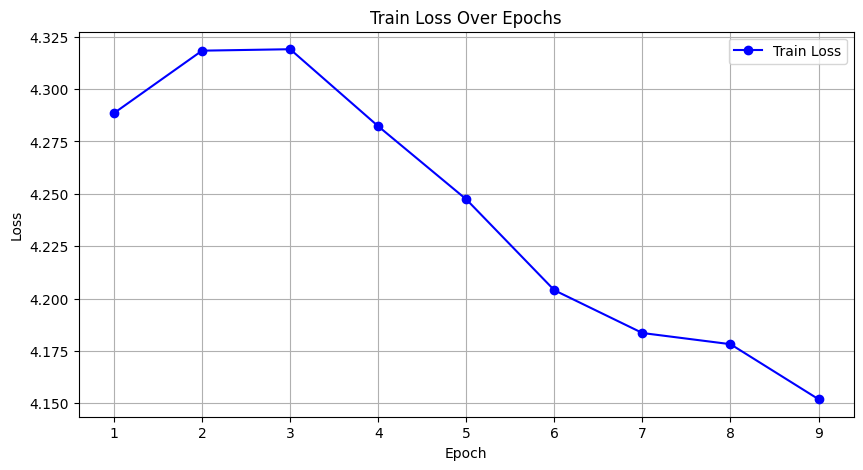

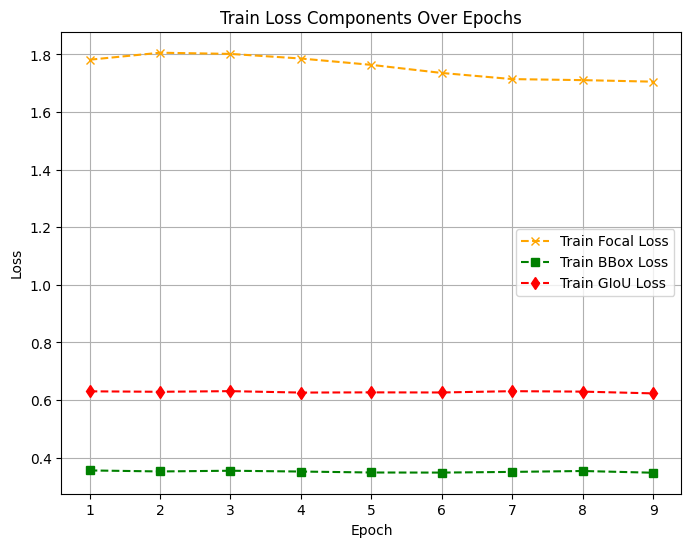

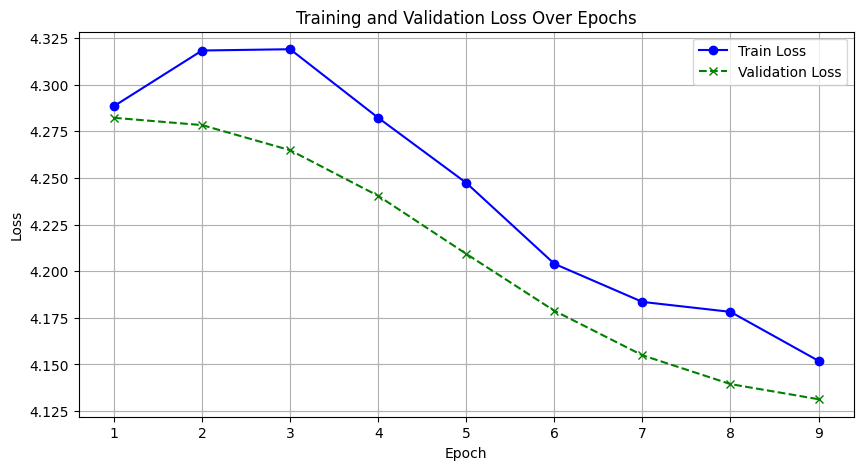

In [ ]:
plot_loss_graphs(epochs_list_AdaLoRA, train_total_losses_AdaLoRA, train_focal_losses_AdaLoRA, train_bbox_losses_AdaLoRA, train_giou_losses_AdaLoRA, val_total_losses_AdaLoRA)


In [ ]:
# Load the saved model from last epoch
model_with_AdaLoRA = torch.load("adalora_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(model_with_AdaLoRA.peft_config)

# Check which weights have been updated
for name, param in model_with_AdaLoRA.named_parameters():
    if param.requires_grad:
        print(f"{name} Trainable (Updated)")
    else:
        print(f"{name} Frozen (Original)")

print(model_with_AdaLoRA)


{'default': AdaLoraConfig(task_type=None, peft_type=<PeftType.ADALORA: 'ADALORA'>, auto_mapping=None, base_model_name_or_path='hustvl/yolos-small', revision=None, inference_mode=False, r=8, target_modules={'query', 'value'}, exclude_modules=None, lora_alpha=8, lora_dropout=0.0, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern=None, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False, target_r=16, init_r=24, tinit=20, tfinal=40, deltaT=8, beta1=0.9, beta2=0.88, orth_reg_weight=0.01, total_step=100)}
base_model.model.vit.embeddings.cls_token Frozen (Original)
base_model.model.vit.embeddings.detection_tokens Frozen (Original)
base_model.model.vit.embeddings.positi

<ipython-input-45-902f26a97f21>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_AdaLoRA = torch.load("adalora_model.pth", map_location=torch.device("cuda" if tor

In [ ]:
# Mean value of AdaLoRA layers after training
for name, param in model_with_AdaLoRA.named_parameters():
    if "lora" in name:
        print(f"{name} mean after training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default mean after training: -0.000346
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default mean after training: -0.000124
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_E.default mean after training: 0.000066
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_A.default mean after training: -0.000264
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_B.default mean after training: -0.000467
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_E.default mean after training: -0.000443
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_A.default mean after training: 0.000295
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_B.default mean after training: 0.000113
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_E.default mean after training: -0.001498
base_model.model.vit.e

#### **Evaluate Model with AdaLoRA**

0it [00:00, ?it/s]

Detected sports ball with confidence 1.0 at location [49.86, 193.68, 188.72, 328.5]
Detected person with confidence 0.896 at location [140.0, 22.34, 462.06, 475.72]
Detected person with confidence 0.998 at location [425.44, 29.51, 618.74, 477.08]
Detected person with confidence 0.997 at location [16.7, 21.51, 461.03, 474.98]


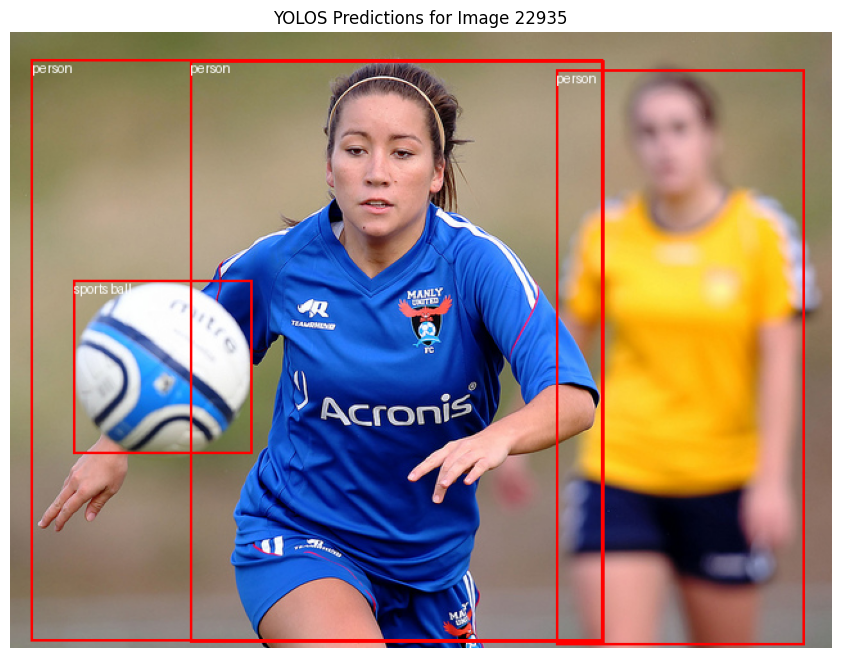

900it [03:44,  4.01it/s]


mAP@[0.5:0.95]: tensor(0.3334)
Detailed mAP results: {'map': tensor(0.3334), 'map_50': tensor(0.5154), 'map_75': tensor(0.3440), 'map_small': tensor(0.0966), 'map_medium': tensor(0.3195), 'map_large': tensor(0.5118), 'mar_1': tensor(0.2846), 'mar_10': tensor(0.4152), 'mar_100': tensor(0.4272), 'mar_small': tensor(0.1503), 'mar_medium': tensor(0.4054), 'mar_large': tensor(0.5997), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Model with AdaLoRA Performance (mAP): {'map': tensor(0.3334), 'map_50': tensor(0.5154), 'map_75': tensor(0.3440), 'map_small': tensor(0.0966), 'map_medium': tens

map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.333447  0.515363  0.344044   0.096612    0.319472   0.511807  0.284558   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.415218  0.427248   0.150288    0.405356   0.599669           -1.0   

   mar_100_per_class  
0               -1.0

In [ ]:
model_with_AdaLoRA_results = evaluate_model(model_with_AdaLoRA, processor, test_dataset, yolos_categories)
print("Model with AdaLoRA Performance (mAP):", model_with_AdaLoRA_results)

model_with_AdaLoRA_results_dict = {
    key: value.item() if isinstance(value, torch.Tensor) else value
    for key, value in model_with_AdaLoRA_results.items()
    if key != "classes"
}
model_with_AdaLoRA_results_df = pd.DataFrame([model_with_AdaLoRA_results_dict])
print("Model with AdaLoRA Performance (mAP):")
print(model_with_AdaLoRA_results_df)
display(model_with_AdaLoRA_results_df)
